# Plotting Quantum Advantage for different classes of Algorithms

Team: Martha Domhöfer Mdomhoefer 963746, Taher Habib 976751 thabib, Maksims Ivanovs (guest student), Ronja von Kittlitz rvonkittlitz 970638, Lara Schmidt laraschmidt 963678, Saranraj Nambusubramaniyan 962621, Leonhard von Heinz lvonheinz 966080

In [3]:
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

Importing the requisite Libraries for plotting.

In [28]:
#initialize the N axis
N = np.linspace(2,50, 1000)
Ntwo = np.linspace(2,10**20,1000) #adjusting xaxis for prime factorisation

quantum_comp = []
classical_comp = []

r_comp = np.array

We then initialize the N axis for natural numbers from 1 to 50. Since the turning points of speedup measured by the ratio were visible with N = 50, except for 1. prime factorisation where N should be set to ~10^18 to see the shifting point where quantum 0(N^3) succedes over classical 0(2**((np.log(n))*(np.log(np.log(n))

'quantum_comp' is a list that stores the values for the complexity function of the fastest quantum algorithm for the problems we choose

'classical_comp' is a list that stores the values of the complexity function of the fastes classical algorithm for the problems we choose

Here, we depict the following problems:
    1. Prime Factorization
    2. Unstructured Search
    3. Verifying Matrix Products
    4. Formula Evaluation
    5. Abelian Hidden Subgroup
    6. Subset sum
    7. Matrix Multiplication over Semirings
    8. Deutsch-Jozsa 
    9. HHL algorithm vs gaussian elimination algorithm
    
    
For each problem we found out the corresponding complexity classes for the classical and quantum algorithms and added a list of the values that correspond to the runtime of the algoithm to classical_comp and quantum_comp.
The values were computed by applying the formular of the complexity class to the values from 2-1000.

1 For Prime Factorization:
    1. Complexity order of Classical Algorithm: 2^((log N)(log(log N))
    2. Complexity order of Quantum Algorithm: N^3

In [5]:
#1prime factorization
classical_comp.append([2**((np.log(n))*(np.log(np.log(n)))) for n in N])
quantum_comp.append([n**3 for n in N])

2 For Unstructured Search:
    1. Complexity order of Classical Algorithm: 2^n
    2. Complexity order of Quantum Algorithm: 2^(n/2)

In [6]:
#2 unstructured search
classical_comp.append([2**n for n in N])
quantum_comp.append([2**(n/2) for n in N]) 

3 For Formula Evaluation:

1. Complexity order of Classical Algorithm: n^2
2. Complexity order of Quantum Algorithm: n^7/4

In [7]:
#3.Verifying Matrix Products
classical_comp.append([n**2 for n in N])
quantum_comp.append([n**(7/4) for n in N]) 

4 For Formula Evaluation:
    1. Complexity order of Quantum Algorithm: 2^0.5n
    2. Complexity order of Classical Algorithm: 2^0.753n

In [8]:
#4Formula Evaluation
quantum_comp.append([2**(0.5*n) for n in N])
classical_comp.append([2**(0.753*n) for n in N])

5 For Abelian Hidden Subgroup:
    1. Complexity order of Quantum Algorithm: log(n)
    2. Complexity order of Classical Algorithm: n

In [9]:
#5Abelian Hidden Subgroup
quantum_comp.append([np.log(n) for n in N])
classical_comp.append([n for n in N])

6 For Subset sum:
    1. Complexity order of Classical Algorithm: 2^0.291n
    2. Complexity order of Quantum Algorithm: 2^0.241n

In [10]:
#6Subset sum
classical_comp.append([2**(0.291*n) for n in N])
quantum_comp.append([2**(0.241*n) for n in N])

7 For Matrix multiplication over semirings:
    1. Complexity order of Classical Algorithm:n^2.687
    2. Complexity order of Quantum Algorithm: n^2.473

In [11]:
#7matrix multiplication over semirings
classical_comp.append([n**(2.687) for n in N])
quantum_comp.append([n**(2.473) for n in N])

8 For Deutsch-Jozsa algorithm

1. Complexity order of Classical Algorithm:2^(n-1)+1
2. Complexity order of Quantum Algorithm: n

In [12]:
#8 Deutsch-Josza 
classical_comp.append([(2**(n-1))+1 for n in N])
quantum_comp.append([n for n in N])

9 For HHL algorithm vs gaussian elimination algorithm

    Complexity order of Classical Algorithm: n^3
    Complexity order of Quantum Algorithm: log(n)*k^2



In [13]:
#9 
classical_comp.append([n**3 for n in N]) #9 Gaussiuan elimination algoritm
quantum_comp.append([(np.log(n))*(100) for n in N]) #9 HHL algorithm where k^2, with k=10 is 100

In [14]:
#list of names of the problems so that the names can be shown on the plots

algorithms = ['Prime_Factorization', 'Unstructured_Search', 'Matrix_products_Verification',\
              'Formula_Evaluation', 'Abelian_Hidden_Subgroup', 'Polynomial_Interpolation',\
              'Subset_sum', 'Matrix_multiplication_over_Semirings', 'Solving Linear Systems']

First we plotted what the complexity of the classical and the quantum algorithm looked like in comparison for each problem 

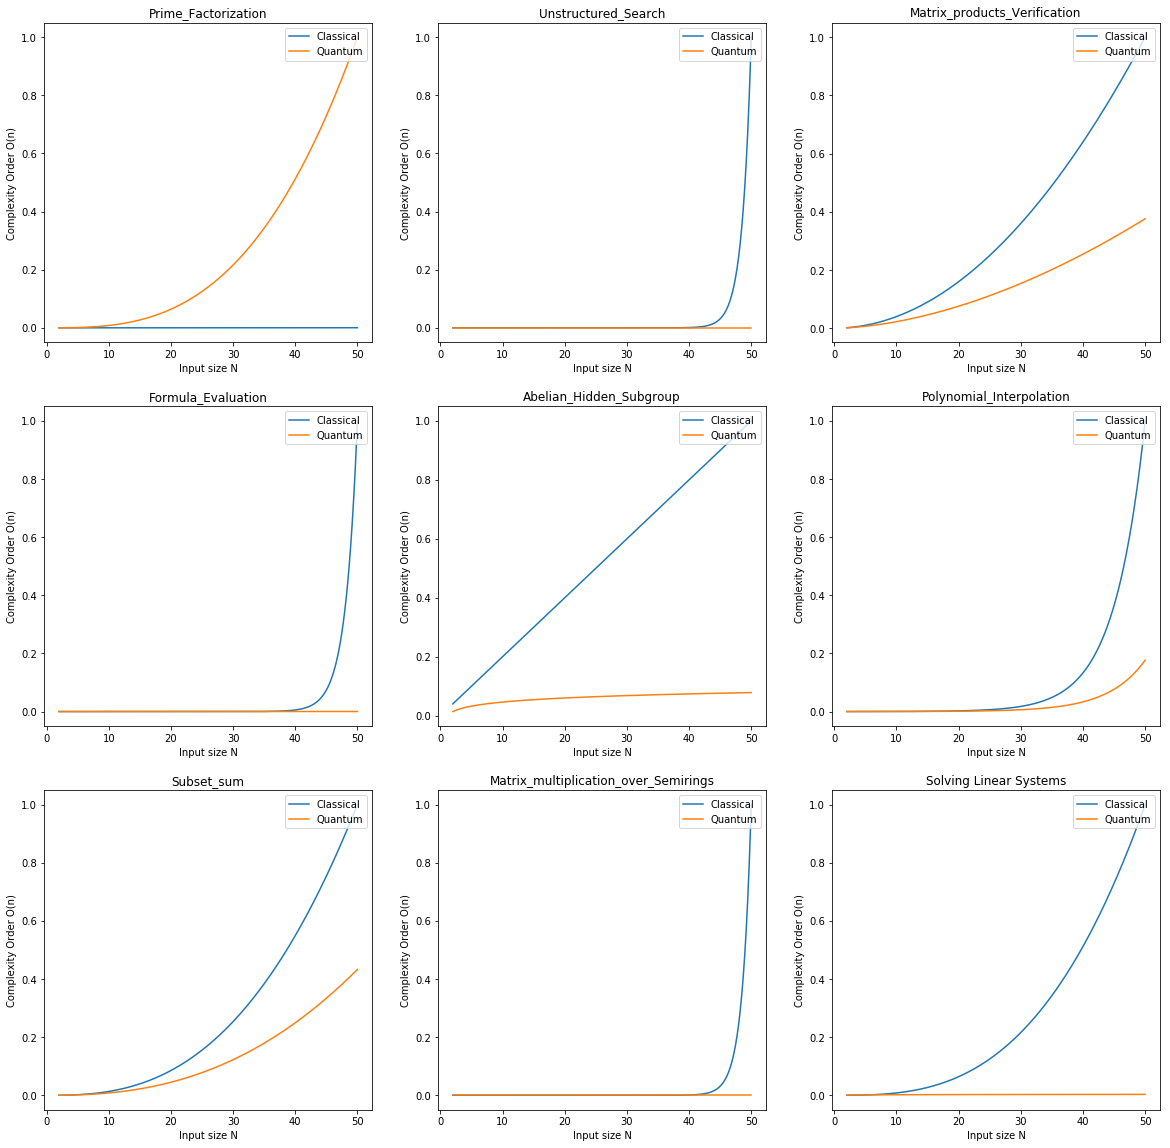

In [15]:
%matplotlib inline

plt.figure(figsize = (20,20))
for i in range(1,10):
    plt.subplot(3,3,i)
    # maximum is used to normalize the data so that the y-scale 
    # always has values from 0-1 without loosing the structure of the data
    maximum = max(max(quantum_comp[i-1]),max(classical_comp[i-1]))
    plt.plot(N, (classical_comp[i-1]/maximum), label = 'Classical')
    plt.plot(N, (quantum_comp[i-1]/maximum), label = 'Quantum')
   
    plt.xlabel('Input size N')
    plt.ylabel('Complexity Order O(n)')
    plt.legend(loc = 'upper right')
    plt.title(algorithms[i-1])

plt.show()

Secondly we plotted the ratio of quantum/classical for each problem to show how quantum speed up depends on input size for each problem

/Users/Ronja/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


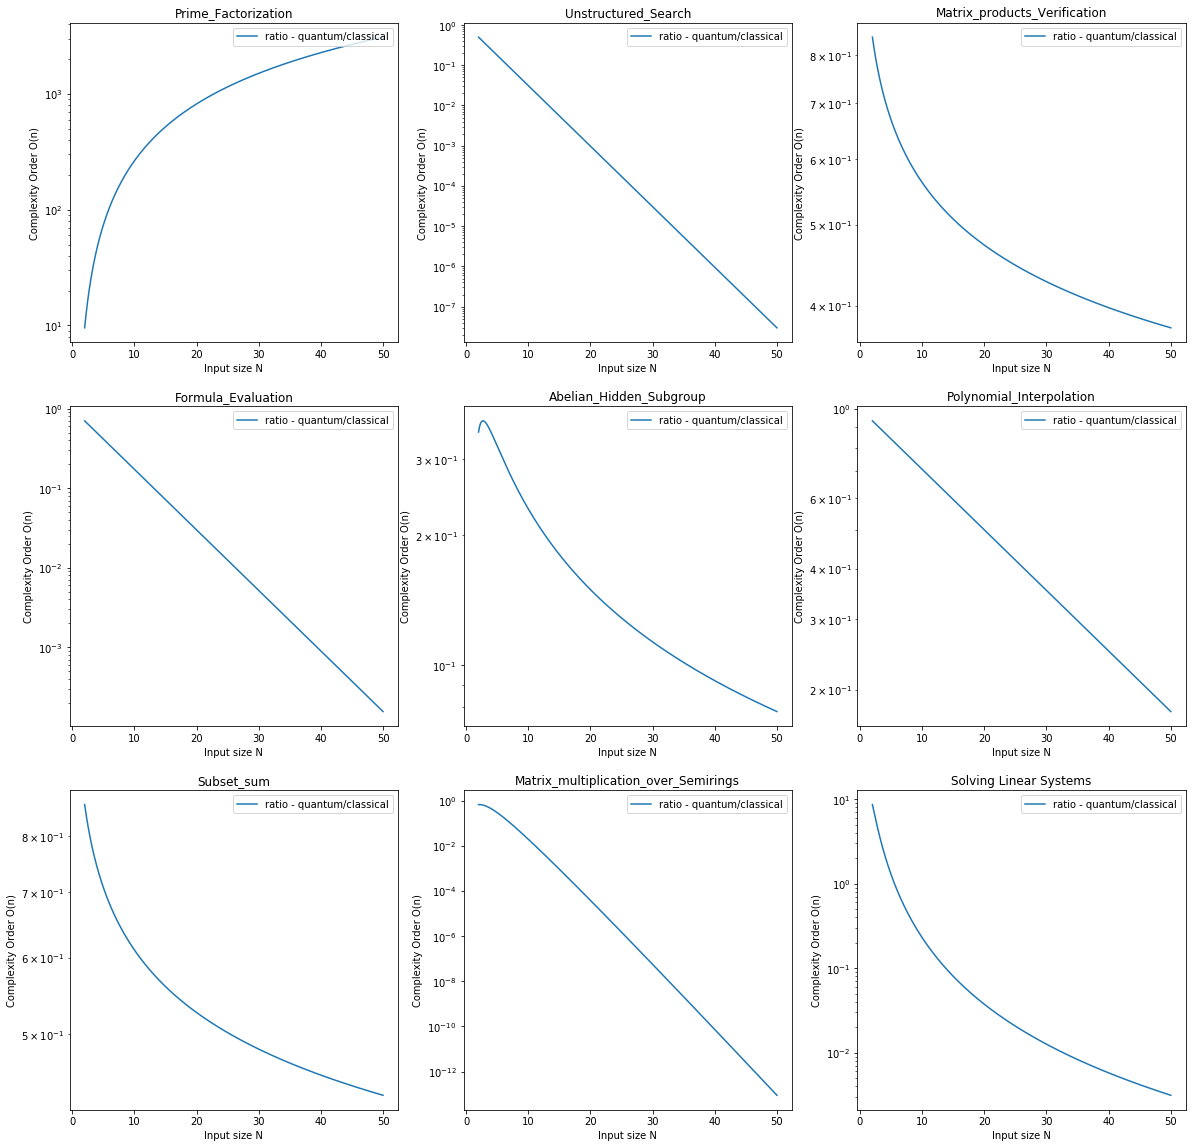

In [16]:
%matplotlib inline

r_comp = np.array(quantum_comp)/np.array(classical_comp)

plt.figure(figsize = (20,20))
for i in range(1,10):
    plt.subplot(3,3,i)
    
    plt.plot(N, r_comp[i-1],label = 'ratio - quantum/classical')
    
    yx = plt.subplot(3,3,i)
    yx.set_yscale("log", nonposy='clip')
    
    plt.xlabel('Input size N')
    plt.ylabel('Complexity Order O(n)')
    plt.legend(loc = 'upper right')
    plt.title(algorithms[i-1])

    

plt.show()

The speedup in runtime of quantum computation compared to classical calculation is measured by the ratio of quantum/classical.
Because of this decreasing ratio function correlates/shows the domination of runtime efficieny of quantum algorithm over classical algorithm.



The third plot we made is a comparision of the ration for the different problems so that one can compare how quantum advantage behaves depended on the input size for the different problems. There are checkbottuns so that one can choose for which problems he wants to see the ratios. 

In [27]:
%matplotlib qt
from matplotlib.widgets import CheckButtons

#algorithms = algorithms[3:7]

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1)

#fig, ax = plt.subplot()
line_objects = []
for i, algorithm in enumerate(algorithms):
    line_objects.append(ax.plot(N, r_comp[i],label = algorithm))
    
plt.xlabel('Sample Size')
plt.ylabel('Ratio of Performance')
plt.legend(loc = 'upper right')
plt.title("Ratios of Performance for different algorithms")
plt.autoscale(True,True,True)
ax.set_yscale("log")


rax = plt.axes([0.05, 0.4, 0.1, 0.15])
check = CheckButtons(rax, algorithms, np.ones(10))
def func(label):
    """if label == '':
        l0.set_visible(not l0.get_visible())
    elif label == '4 Hz':
        l1.set_visible(not l1.get_visible())
    elif label == '6 Hz':
        l2.set_visible(not l2.get_visible())
    """
    for i, algorithm in enumerate(algorithms):
        if label == algorithm:
            line_objects[i][0].set_visible(not line_objects[i][0].get_visible())
    
    ax.set_yscale("log", nonposy='clip')
    plt.draw()
check.on_clicked(func)


plt.draw()

print(line_objects)

[[<matplotlib.lines.Line2D object at 0x158e75f98>], [<matplotlib.lines.Line2D object at 0x158e759b0>], [<matplotlib.lines.Line2D object at 0x158e75320>], [<matplotlib.lines.Line2D object at 0x10b08fa20>], [<matplotlib.lines.Line2D object at 0x10b08f6a0>], [<matplotlib.lines.Line2D object at 0x10b08f0f0>], [<matplotlib.lines.Line2D object at 0x121999588>], [<matplotlib.lines.Line2D object at 0x121999e48>], [<matplotlib.lines.Line2D object at 0x1219999e8>]]


[[<matplotlib.lines.Line2D object at 0x15535fda0>]]
